In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/archive/parkinsons_disease_data.csv')

In [ ]:
X = df.iloc[:, 1:33].values
y = df.iloc[:, 33].values

Veri Setini Eğitim ve Test Veriseti Olarak Ayırma

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

Train set: (1578, 32) (1578,)
Test set: (527, 32) (527,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


***Yapay Sinir Ağı Modelini Oluşturmak***

Tahminleme yapımızı oluşturmak için yapay sinir ağımızı eğitmeye başlayalım.
10’ar düğümden oluşan 4 katlı bir Gizli Katman Ağı oluşturalım;

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpcl = MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30), max_iter=100000)
# y_train is already a numpy array, calling .values is unnecessary and incorrect.
# .ravel() is still needed to ensure the y_train is a 1D array.
mlpcl.fit(X_train, y_train.ravel())

MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30), max_iter=100000)

MLPClassifier, scikit-learn kütüphanesinin yapay sinir ağı (Multi-layer Perceptron) sınıflandırıcı modelidir. Bu modelin temel amacı, verileri sınıflandırmak için çok katmanlı bir yapay sinir ağı kullanmaktır.
*   hidden_layer_sizes: Bu parametre, gizli katmanların (hidden layers) yapısını belirler.
*   hidden_layer_sizes=(10, 10, 10, 10) ifadesi, modelin 4 gizli katmana sahip olacağını ve her bir gizli katmanda 10 nöron (units) bulunacağını belirtir. Yani burada 4 gizli katman vardır ve her bir katmanda 10 nöron bulunmaktadır.
*   max_iter: Bu parametre, modelin eğitim sırasında yapacağı maksimum iterasyon sayısını belirtir. Yani modelin ne kadar süre eğitileceği ile ilgili bir sınır koyar.
*   max_iter=10000, modelin eğitimde 10000 iterasyon yapmasına izin verir. Bu sayede model daha uzun süre eğitim yapabilir, daha iyi sonuçlar verebilir.



Test Verilerimiz Üzerinde Tahminlemelerde Bulunalım

In [ ]:
predictions = mlpcl.predict(X_test)

In [ ]:
from sklearn import metrics
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,mlpcl.predict(X_train)))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,predictions))

Eğitim verisi doğruluğu: 1.0
Test verisi doğruluğu: 0.7741935483870968


Tahminlememizin – Algoritmamizin Performansını Olcumleyelim

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[137  52]
 [ 49 289]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       189
           1       0.85      0.86      0.85       338

    accuracy                           0.81       527
   macro avg       0.79      0.79      0.79       527
weighted avg       0.81      0.81      0.81       527



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[137  52]
 [ 49 289]]


In [ ]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Duyarlılık (Sensitivity):", sensitivity)
print("Özgüllük (Specificity):", specificity)

Duyarlılık (Sensitivity): 0.8550295857988166
Özgüllük (Specificity): 0.7248677248677249


In [ ]:
f1 = f1_score(y_test, predictions)
print("F1 Skoru:", f1)

F1 Skoru: 0.8512518409425626


In [ ]:
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5819332846359874


AUC: 0.8754422215960678


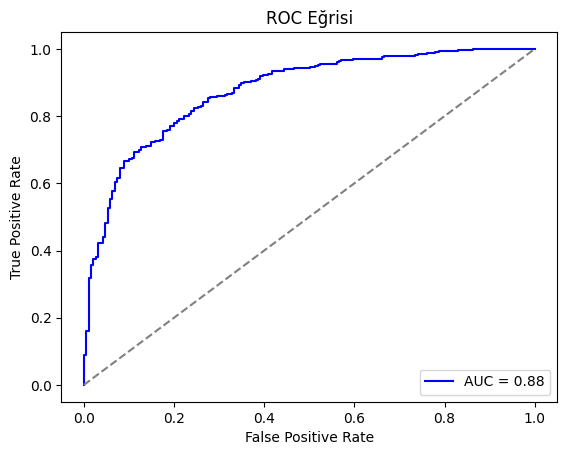

In [ ]:
y_proba = mlpcl.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print("AUC:", auc)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

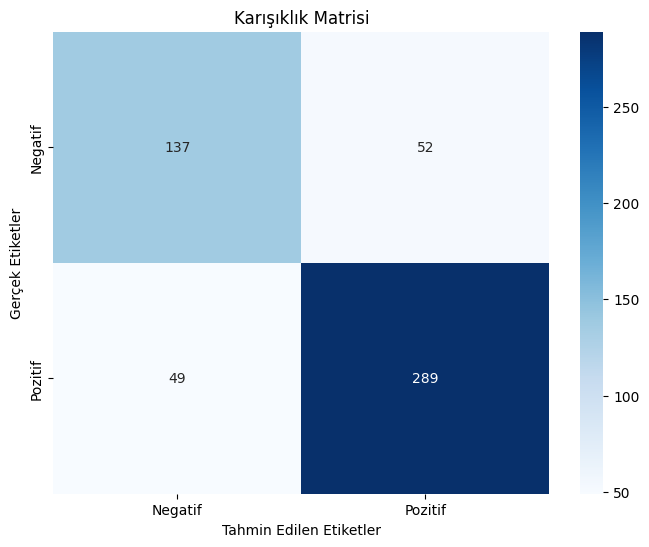

In [ ]:
# Tahminleri oluştur
y_pred = mlpcl.predict(X_test)

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, predictions)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()